# Regularisation
This exercise assumes that you have read the tutorial about regularisation and cross validation tutorial
. You will use regularisation on the basis of the cross validation results to mitigate the effects overfitting.

---
**Task 1 (easy): Reflection on the tutorial👩‍💻♾️**
1. Run the cell in the tutorial implementing the hold-out train-validation split. 
2. Add a for-loop to rerun the code 20 times and store the $R^2$ results from each iteration. 
3. Calculate the mean and variance of the $R^2$ scores. Explain the results. 
4. Go back to the last part of tutorial and train the models with 3rd, 4th, and 5th order polynomials by using 10 fold cross validation. Does this affect the fit of the models? 


---

```
R2 list:    [0.23582962646174288, 0.41494876246339296, 0.41280875857331867, -0.1756017273509758, 0.42962857245359853, 0.41270836833071356, 0.3268973960574004, 0.41402462153465336, 0.42390951358724593, 0.43548576587542087, 0.38885113320927134, 0.418277513507311, 0.4390928747939976, 0.39803776307184235, 0.46408196788770306, 0.4454053801601239, 0.3980978320986778, 0.363057455062746, 0.4134013175298582, 0.4445514487801008]
mean:       0.3751747172044072
variance:   0.36643324850736364
```

4.

```
R2 list:    [-31.4854684352986, -4678740.361226748, -3182677316.6941924]
mean:       -1062452029.5136291
variance:   6.743043847758225e+18
```

So what we see is a negative R2 value, which means that the model isn't capturing the underlying pattern at all, and its actually better to just take the average if the dependent variable

## Overview
The following cell imports relevant libraries and sets up the dataset and model using the same configuration as in the tutorial:


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge # additional import for regularization

np.random.seed(99)

dataset = fetch_california_housing(as_frame=True)

df = dataset.frame # This is the dataframe (a table)

X = dataset.data # These are the input features (anything but the house price)
y = dataset.target # This contains the output features (just the house price)

## Regularization

---
**Task 2 (easy): Implementing regularization👩‍💻**
In the tutorial, it was observed that incorporating the third or higher order polynomial features into a standard linear regression model leads to overfitting. In the following steps you will create a model pipeline similar to the one used in the tutorial using ridge regression.
1. Create a third-order polynomial model with ridge regression (use the `Ridge`
 class imported from Scikit learn).
2. Use the `np.geomspace`
 function to create an array, `regularization_params`
, with values exponentially spaced between $10^{-10}$ and $10^2$. These values will be used to vary the regularization parameter. 
3. Train third-order Ridge regression models, by iterating over the elements in `regularization_params`
. 
4. Store the test scores in an array, as they will be used in the next task.

**Note:** Note: the regularization parameter $\lambda$ in the lectures is called alpha in sckit learn.


---

In [47]:
# 1
model = Pipeline([
    ("features", PolynomialFeatures(3)),
    ("normalization", Normalizer()),
    ("model", Ridge()),
])

# 2
regularization_params = np.geomspace(10 ** -10, 10 ** 2)

# 3 + 4
test_scores = []
for alpha in regularization_params:
    model.set_params(model__alpha=alpha)

    kfold = KFold(10, shuffle=True)
    results = cross_validate(
        model,
        X,
        y,
        cv=kfold,
        scoring="r2", 
        return_train_score=True,
        return_estimator=True,
    )

    test_score = results["test_score"]
    test_scores.append(test_score)

print(len(test_scores))

50



---
**Task 3 (easy): Evaluating models👩‍💻**
1. Calculate the mean $R^2$ score for each model (each regularization value) and plot them.

**Note:** Hint: It may be difficult to evaluate the small values. Use `plt.xscale('log')`
 to get evenly spaced points. 

2. Calculate the standard deviation of the scores for each model and plot them. 

**Note:** Hint: use logarithmic scales for both the x- and y-axis.

3. Based on the generated plots, which regularization parameter value gives the best results and why? Note down your observations and reflections in the text field below as it will be used in the next task.


---

### 3
Just around $10^1$ is the sweet spot, as the mean is high, while the standard deviation is low

This means that the model explains a higher porportion of the variance in the dependent variable (high mean), while the models are also consistent acorss the different splits (deviation)


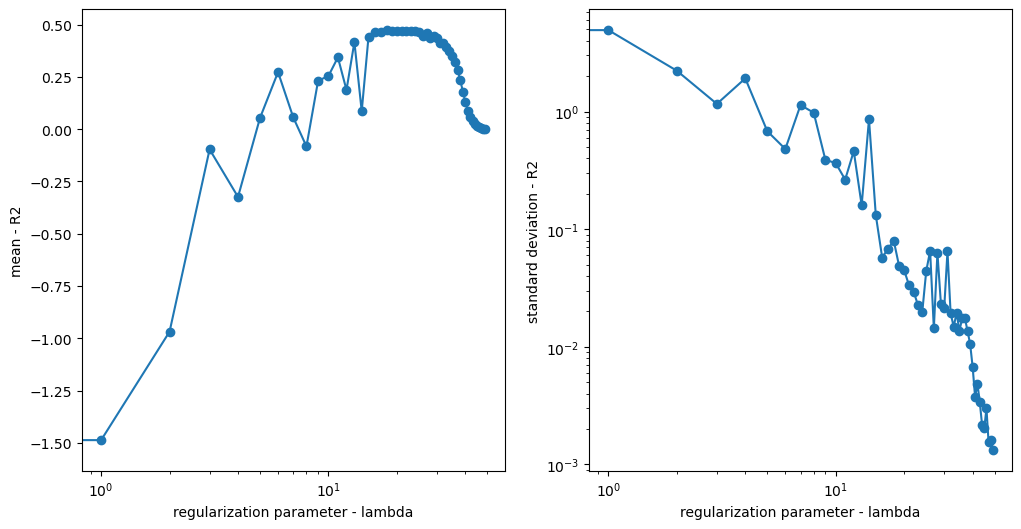

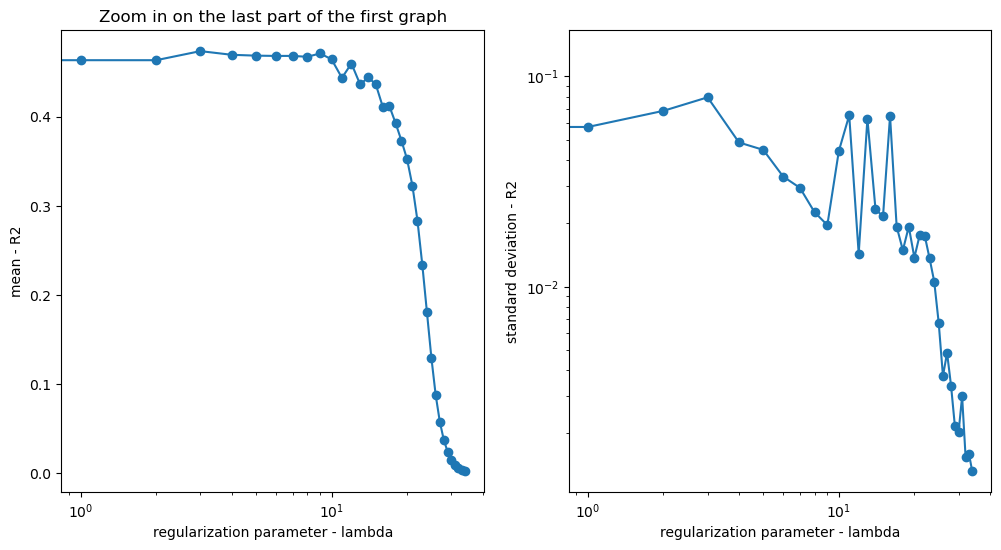

18
2.5595479226995334e-06
0.4737559507315135
0.07946195535671662


In [50]:
# Write your solution here
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 1
test_scores_r2_mean = [score.mean() for score in test_scores]

axs[0].plot(test_scores_r2_mean, marker='o')
axs[0].set_xlabel("regularization parameter - lambda")
axs[0].set_ylabel("mean - R2")
axs[0].set_xscale('log')

# 2
test_scores_standard_deviation = [score.std() for score in test_scores]

axs[1].plot(test_scores_standard_deviation, marker='o')
axs[1].set_xlabel("regularization parameter - lambda")
axs[1].set_ylabel("standard deviation - R2")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
plt.show()

# 3
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(test_scores_r2_mean[len(test_scores_r2_mean)//2-10:], marker='o')
axs[0].set_title("Zoom in on the last part of the first graph")
axs[0].set_xlabel("regularization parameter - lambda")
axs[0].set_ylabel("mean - R2")
axs[0].set_xscale('log')

axs[1].plot(test_scores_standard_deviation[len(test_scores_standard_deviation)//2-10:], marker='o')
axs[1].set_xlabel("regularization parameter - lambda")
axs[1].set_ylabel("standard deviation - R2")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
plt.show()


---
**Task 4 (medium): Cross validation👩‍💻**
This task investigates model generalization using k-fold cross validation.
1. Construct a new model, with the same setup as before by using the optimal regularization parameter found in the previous task. 
2. Train the model using k-fold cross validation. Set the number of folds to 2.
3. Vary the number of folds from 2 to 20 and store the mean and the standard deviation of the $R^2$ score for each fold. 
4. Plot the mean and the standard deviation of the $R^2$  scores.
5. (Optional) This task uses the `RepeatedKFold`
 function to obtain a more robust evaluation of model performance. `RepeatedKFold`
 repeats k-fold cross-validation 10 times by default. The folds are chosen randomly for each repetition. The runtime can be reduced by decreasing the number of repetitions (`n_repeats`
 parameter).


---

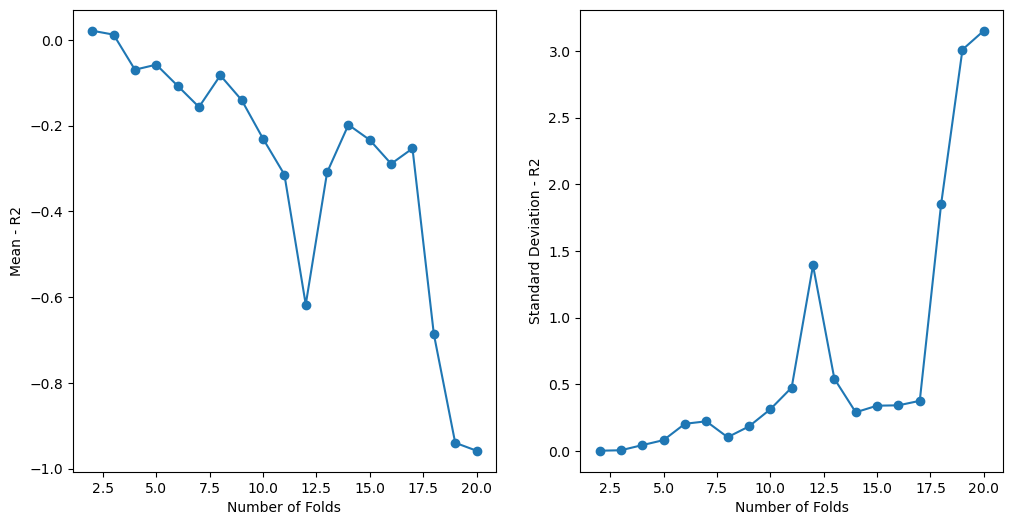

In [61]:
# Write your solution here 
# 1
model = Pipeline([
    ("features", PolynomialFeatures(3)),
    ("normalization", Normalizer()),
    ("model", Ridge()),
])

regularization_param_alpha = 10 ** 0.5
model.set_params(model__alpha=regularization_param_alpha)

# 2
mean_standard_deviations = []
for k in range(2, 21, 1):
    kfold = KFold(k, shuffle=False)
    results = cross_validate(
        model,
        X,
        y,
        cv=kfold,
        scoring="r2", 
        return_train_score=True,
        return_estimator=True,
    )

    test_score = results['test_score']
    mean_standard_deviations.append((test_score.mean(), test_score.std()))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

means = [item[0] for item in mean_standard_deviations]
standard_deviations = [item[1] for item in mean_standard_deviations]

axs[0].plot(range(2, 21), means, marker='o')
axs[0].set_xlabel("Number of Folds")
axs[0].set_ylabel("Mean - R2")

axs[1].plot(range(2, 21), standard_deviations, marker='o')
axs[1].set_xlabel("Number of Folds")
axs[1].set_ylabel("Standard Deviation - R2")
plt.show()



---
**Task 5 (medium): Reflection on results💡**
1. Use the plotted mean and variance to argue for model performance. 
2. List reasons for the variability in model performance? 
3. Compare the variability in model perfomance observed in the tutorial with the results of the current exercise.
4. Argue how the regularized model performs compared to the standard linear regression implemented in the tutorial.     - Print the model parameters and use them to argue for differences between the linear model and the regularized model.




---

1. The model seems to perform well, with an optimal amount of folds around 7 as the mean seems to plateou. Though counter intuitively we see an increase in the standard deviation as the amount of folds increases, meaning that the model performance varies more between each split.
2. 